<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracting the Dataset using Kaggle API**

In [1]:
# Installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing the Dog vs Cat Dataset from Kaggle**

In [3]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

 95% 769M/812M [00:16<00:02, 20.0MB/s]
100% 812M/812M [00:17<00:00, 50.1MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in the train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images : ', file_count)

Number of images :  25000


**Printing the name of images**

In [8]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.7807.jpg', 'dog.2268.jpg', 'cat.10968.jpg', 'cat.2034.jpg', 'dog.2045.jpg', 'dog.4646.jpg', 'cat.4593.jpg', 'cat.11976.jpg', 'cat.4673.jpg', 'cat.5309.jpg', 'cat.3347.jpg', 'cat.2734.jpg', 'dog.1341.jpg', 'cat.7038.jpg', 'dog.3118.jpg', 'dog.8369.jpg', 'dog.4327.jpg', 'cat.10007.jpg', 'dog.634.jpg', 'dog.2802.jpg', 'cat.2833.jpg', 'cat.7462.jpg', 'cat.9592.jpg', 'cat.4240.jpg', 'dog.1160.jpg', 'cat.4095.jpg', 'dog.10057.jpg', 'cat.9951.jpg', 'cat.1098.jpg', 'cat.10059.jpg', 'dog.9198.jpg', 'dog.10694.jpg', 'dog.1352.jpg', 'cat.8897.jpg', 'dog.9519.jpg', 'dog.8172.jpg', 'cat.7220.jpg', 'cat.6054.jpg', 'cat.505.jpg', 'cat.5067.jpg', 'dog.9354.jpg', 'cat.5509.jpg', 'cat.4755.jpg', 'dog.4119.jpg', 'dog.3456.jpg', 'cat.6826.jpg', 'cat.7378.jpg', 'cat.6812.jpg', 'cat.9840.jpg', 'dog.9773.jpg', 'dog.4044.jpg', 'dog.1348.jpg', 'dog.9447.jpg', 'dog.2697.jpg', 'cat.489.jpg', 'dog.4797.jpg', 'cat.6631.jpg', 'dog.8224.jpg', 'cat.1595.jpg', 'cat.11691.jpg', 'dog.943.jpg', 'dog.1973.jpg', 'dog

**Importing the Dependencies**

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

**Deploying the images of dogs and cats**

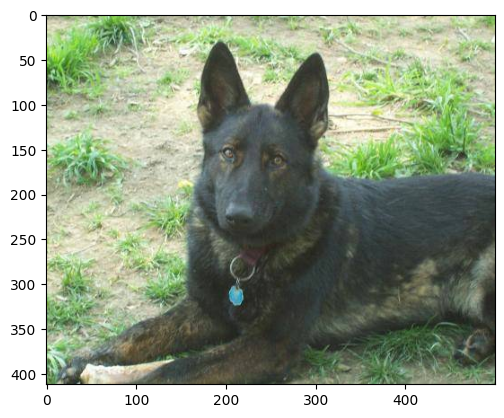

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.2081.jpg')
imgplot = plt.imshow(img)
plt.show()

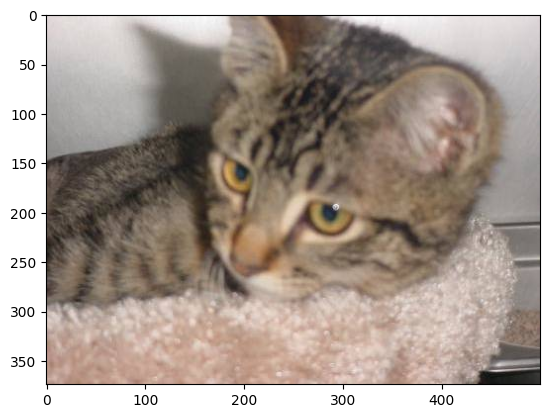

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.10031.jpg')
imgplot = plt.imshow(img)
plt.show()

Resizing all the images

In [12]:
file_names = os.listdir('/content/train')

for i in range (5):
  name = file_names[i]
  print(name[0:3])

cat
dog
cat
cat
dog


In [13]:
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images = ', dog_count)
print('Number of cat images = ', cat_count)

Number of dog images =  12500
Number of cat images =  12500


Resizing all the images

In [14]:
# creating a directory for resized images
os.mkdir('/content/resized_images')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/resized_images/'

for i in range (2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

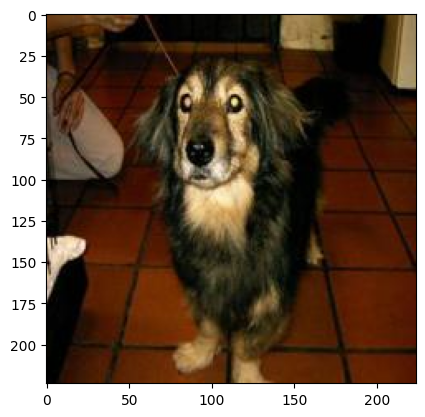

In [18]:
# display resized dog image
img = mpimg.imread('/content/resized_images/dog.10057.jpg')
imgplot = plt.imshow(img)
plt.show()

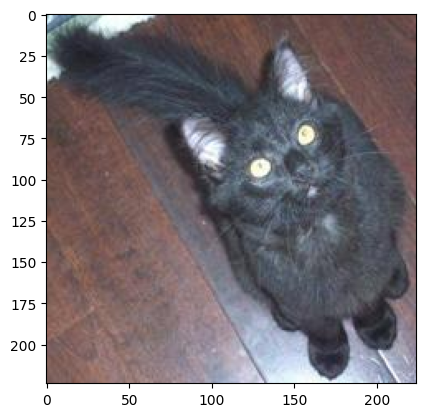

In [22]:
# display resized cat image
img = mpimg.imread('/content/resized_images/cat.10059.jpg')
imgplot = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

**Cat --> 0**

**Dog --> 1**

In [23]:
# creating a for loop to assign labels
filenames = os.listdir('/content/resized_images/')

labels = []

for i in range (2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [24]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 1]
2000


In [25]:
# counting the number of images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 996 1004]


**Converting all the resized images to numpy arrays**

In [26]:
import cv2
import glob

In [27]:
image_directory = '/content/resized_images/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [28]:
print(dog_cat_images)

[[[[ 11  11  11]
   [ 11  11  11]
   [ 11  11  11]
   ...
   [ 22  22  22]
   [ 26  26  26]
   [ 25  25  25]]

  [[ 11  11  11]
   [ 11  11  11]
   [ 11  11  11]
   ...
   [ 24  24  24]
   [ 28  28  28]
   [ 26  26  26]]

  [[ 11  11  11]
   [ 11  11  11]
   [ 11  11  11]
   ...
   [ 25  25  25]
   [ 27  27  27]
   [ 25  25  25]]

  ...

  [[178 126  73]
   [168 117  61]
   [152 101  45]
   ...
   [129 112  69]
   [146 122  80]
   [138 113  69]]

  [[177 113  55]
   [173 111  51]
   [156  94  34]
   ...
   [119 103  67]
   [136 112  76]
   [151 125  88]]

  [[167  97  37]
   [172 105  44]
   [157  90  29]
   ...
   [143 128  95]
   [150 127  95]
   [146 119  85]]]


 [[[ 35  62  89]
   [ 35  62  89]
   [ 48  70  98]
   ...
   [ 13  14  24]
   [ 13  14  24]
   [ 13  14  24]]

  [[ 43  67  91]
   [ 48  72  96]
   [ 55  77 102]
   ...
   [ 13  15  25]
   [ 13  15  25]
   [ 13  15  25]]

  [[ 68  85 104]
   [ 71  88 107]
   [ 75  90 109]
   ...
   [ 12  18  25]
   [ 12  18  25]
   [ 12  18

In [29]:
type(dog_cat_images)

numpy.ndarray

In [30]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [31]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


**1600 --> training images**

**400 --> test images**

In [34]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [35]:
print(X_train_scaled)

[[[[0.41568627 0.55294118 0.60784314]
   [0.41176471 0.54901961 0.60392157]
   [0.41176471 0.54509804 0.60784314]
   ...
   [0.68235294 0.62352941 0.43137255]
   [0.68627451 0.59607843 0.40784314]
   [0.58039216 0.4745098  0.27843137]]

  [[0.41568627 0.55294118 0.60784314]
   [0.41568627 0.55294118 0.60784314]
   [0.41176471 0.54509804 0.60784314]
   ...
   [0.73333333 0.67843137 0.48627451]
   [0.72156863 0.63529412 0.44705882]
   [0.61568627 0.51764706 0.32156863]]

  [[0.41960784 0.55294118 0.61568627]
   [0.41568627 0.54901961 0.61176471]
   [0.41568627 0.54901961 0.61176471]
   ...
   [0.87058824 0.82745098 0.63137255]
   [0.7254902  0.65882353 0.46666667]
   [0.5372549  0.45490196 0.25490196]]

  ...

  [[0.19607843 0.44313725 0.43529412]
   [0.17647059 0.43137255 0.42352941]
   [0.15294118 0.42352941 0.41176471]
   ...
   [0.4        0.56862745 0.39215686]
   [0.41568627 0.57647059 0.37647059]
   [0.42745098 0.58431373 0.36862745]]

  [[0.20392157 0.43921569 0.43529412]
   [0.1

**Building the Neural Network**

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

In [37]:
print(tf.__version__)
print(hub.__version__)

2.19.0
0.16.1


In [53]:
class HubLayer(tf.keras.layers.Layer):
    def __init__(self, url):
        super().__init__()
        self.hub_layer = hub.KerasLayer(url, trainable=False)

    def call(self, inputs):
        return self.hub_layer(inputs)

In [55]:
# Build the model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = HubLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")(inputs)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # Changed from_logits to False
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hub_layer_1 (HubLayer)          │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         2,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,004 (7.83 KB)

 Trainable params: 2,004 (7.83 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [61]:
# Train the model
# You can adjust the number of epochs based on your needs
history = model.fit(X_train_scaled, Y_train, epochs=5, validation_split=0.1)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9944 - loss: 0.0210 - val_accuracy: 0.9688 - val_loss: 0.1142
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9963 - loss: 0.0135 - val_accuracy: 0.9688 - val_loss: 0.1110
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.9688 - val_loss: 0.1138
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9999 - loss: 0.0073 - val_accuracy: 0.9688 - val_loss: 0.1203
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.9688 - val_loss: 0.1178


### Evaluating the Model

In [62]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9770 - loss: 0.0789
Test Loss: 0.06615418195724487
Test Accuracy: 0.9825000166893005


### Visualizing Training History

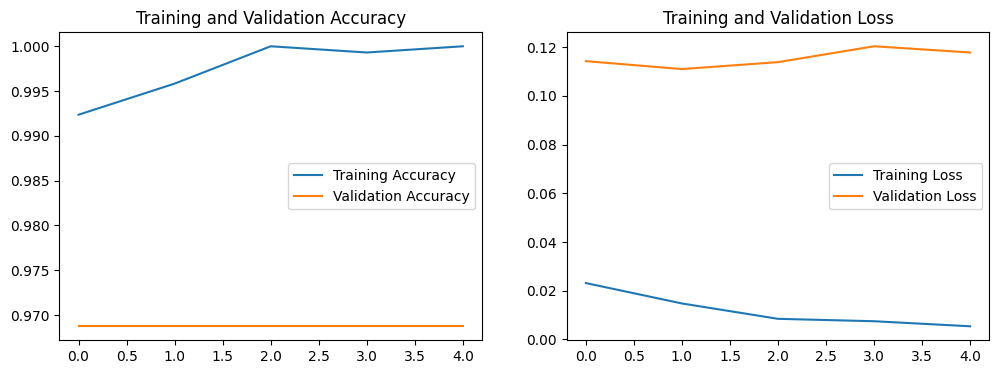

In [64]:
# Get the accuracy and loss from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(accuracy))

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Training and Validation Loss')

plt.show()

### Creating a Predictive System

In [69]:
def predict_dog_or_cat(image_path, model):
    # Load and preprocess the image
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))
    img_array = np.asarray(img)
    img_scaled = img_array / 255.0
    img_scaled = np.expand_dims(img_scaled, axis=0) # Add batch dimension

    # Make prediction
    predictions = model.predict(img_scaled)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    class_names = ['cat', 'dog'] # 0 for cat and 1 for dog

    return class_names[predicted_class_index]

Enter image path/content/cat.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


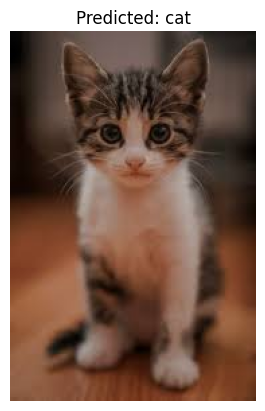

In [71]:
image_path = input("Enter image path")
predicted_label = predict_dog_or_cat(image_path, model)

# Display the image and the prediction
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()